In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os, sys
from PIL import Image, ImageChops
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DIR='/content/drive/My Drive/Clipped_NDVI/'

# Loading Dataset

In [0]:
filenames = os.listdir(DIR)

In [0]:
images = [Image.open(DIR + filename) for filename in filenames]

In [0]:
(height, width) = images[0].size

In [0]:
def image2pixelarray(image):
    (width, height) = image.size
    greyscale_map = list(image.getdata())
    greyscale_map = np.array(greyscale_map)
    greyscale_map = greyscale_map.reshape((height, width))
    return greyscale_map

In [0]:
image_arrays = [image2pixelarray(im) for im in images]

In [0]:
# intensity_2017 = total_intensities[:(len(total_intensities)//2)]
# intensity_2018 = total_intensities[(len(total_intensities)//2):]

In [0]:
# len(intensity_2017), len(intensity_2018)

In [0]:
# plt.figure(figsize=(15, 10))
# plt.plot(intensity_2017)
# plt.plot(intensity_2018)

different plots for both images of same day

In [0]:
# intensity_2017_1 = [intensity_2017[i] for i in range(0, len(intensity_2017), 2)]
# intensity_2017_2 = [intensity_2017[i] for i in range(1, len(intensity_2017), 2)]

# intensity_2018_1 = [intensity_2018[i] for i in range(0, len(intensity_2018), 2)]
# intensity_2018_2 = [intensity_2018[i] for i in range(1, len(intensity_2018), 2)]

In [0]:
# plt.figure(figsize=(15, 10))
# plt.plot(intensity_2017_1)
# plt.plot(intensity_2017_2)

average of same day

In [0]:
# intensity_2017_avg = [(intensity_2017_1[i] + intensity_2017_2[i]) / 2 for i in range(12)]
# intensity_2018_avg = [(intensity_2018_1[i] + intensity_2018_2[i]) / 2 for i in range(12)]

# plt.figure(figsize=(15, 10))
# # plt.plot(intensity_2017_1)
# # plt.plot(intensity_2017_2)
# plt.plot(intensity_2017_avg, label="2017")
# plt.plot(intensity_2018_avg, label="2018")
# plt.legend()

In [0]:
# intensity_2017_avg

NDVI difference in range [-1, 1] ??

In [0]:
diff = (image_arrays[1] - image_arrays[0]) / (image_arrays[1] + image_arrays[0])

In [0]:
diff.min(), diff.max()

In [0]:
NDVIs = [(
    (-image_arrays[i+1] + image_arrays[i]) / (image_arrays[i+1] + image_arrays[i]+0.000006)
) for i in range(0, 48, 2)]

In [0]:
NDVIs[0].min(), NDVIs[0].max()

(-0.999999958333335, 0.9999999062500088)

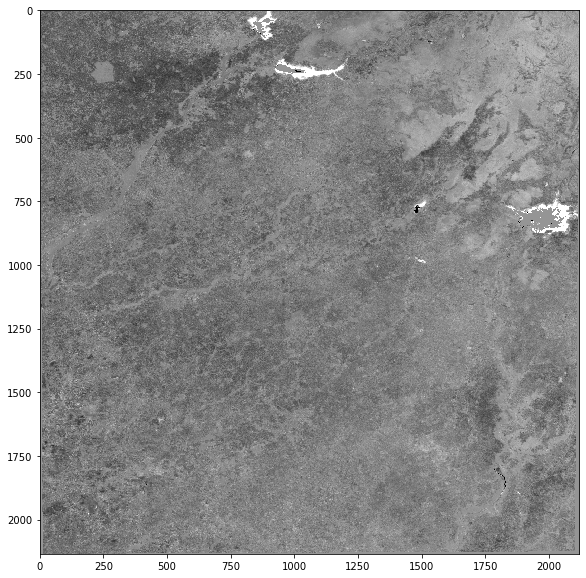

In [0]:
plt.figure(figsize=(10, 10))
plt.imshow(NDVIs[0], cmap="Greys")

In [0]:
NDVIs[0].shape

(2135, 2118)

In [0]:
def show_NDVIs(ndvis, xs=5):
    plt.figure(figsize=(xs, xs*len(ndvis)))
    for idx, img in enumerate(ndvis):
        plt.subplot(len(ndvis), 1, idx+1)
        plt.imshow(img)

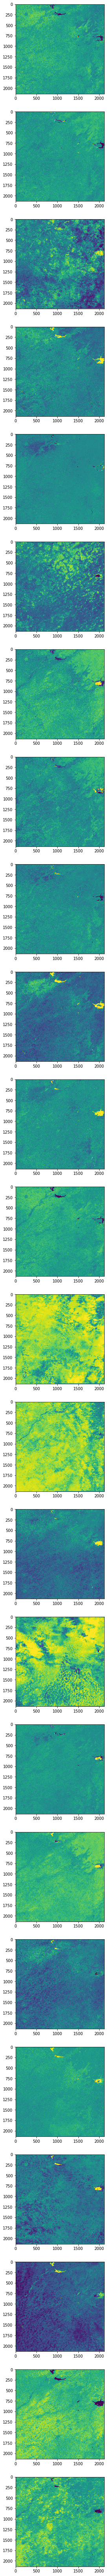

In [0]:
show_NDVIs(NDVIs, 5)

# NDVI Images

In [0]:
NDVI_17_1=NDVIs[:12]
NDVI_18_1=NDVIs[12:]

In [0]:
NDVI_17=[sum(sum(i)) for i in NDVIs[:12]]
NDVI_18=[sum(sum(i)) for i in NDVIs[12:]]

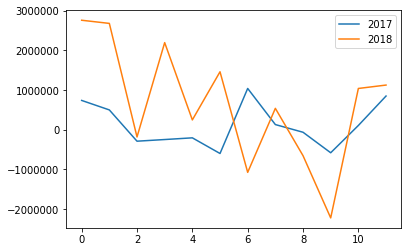

In [0]:
plt.plot(NDVI_17,label='2017')
plt.plot(NDVI_18,label='2018')
plt.legend()

In [0]:
def show_NDVIs_cmp(ndvis,index, xs=5):
    plt.figure(figsize=(xs, xs*len(ndvis)))
    for idx, img in enumerate(ndvis):
        plt.subplot(len(ndvis), 1, idx+1)
        plt.imshow(ndvis[index]-img,cmap='Greys')

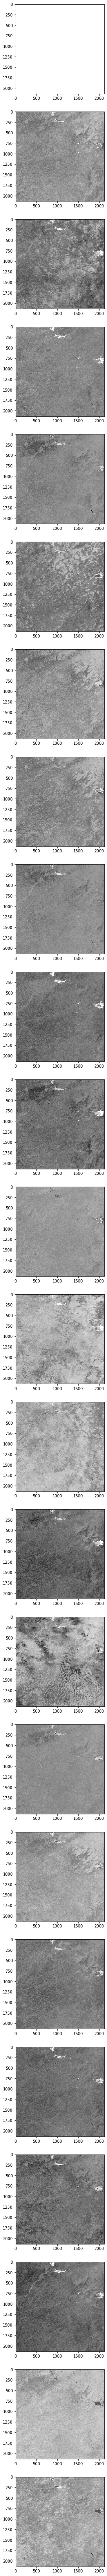

In [0]:
show_NDVIs_cmp(NDVIs,0,xs=5)

In [0]:
NDVIs_aug=[i+1 for i in NDVIs]

In [0]:
show_NDVIs(NDVIs_aug)

In [0]:
def show_NDVIs_17_18(ndvis1,ndvis2, xs=5):
    plt.figure(figsize=(2*xs, xs*len(ndvis1)))
    for idx in range(len(ndvis1)):
        plt.subplot(len(ndvis1), 2, 2*idx+1)
        plt.imshow(ndvis1[idx])
        plt.subplot(len(ndvis2),2,2*idx+2)
        plt.imshow(ndvis2[idx])

In [0]:
show_NDVIs_17_18(NDVI_17_1,NDVI_18_1)

In [0]:
mn=NDVI_17_1[0]
mx=NDVI_17_1[0]
for i in range(11):
  mn=np.minimum(mn,NDVI_17_1[i+1])
  mx=np.maximum(mx,NDVI_17_1[i+1])

In [0]:
mn=NDVI_17_1[0]
mx=NDVI_17_1[0]
for i in range(11):
  cnt=0
  zz=0
  tmp=NDVI_17_1[i+1]-NDVI_17_1[i]
  h,w=tmp.shape
  for k in range(h):
    for j in range(w):
      zz=zz+1
      if tmp[k][j]>0: cnt=cnt+1
  print(cnt,zz)

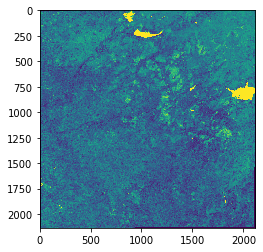

In [0]:
plt.imshow(mx)

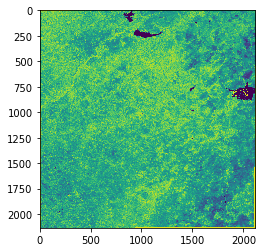

In [0]:
plt.imshow(mn)

In [0]:
def show_NDVIs_cmp(ndvis,xs=5):
    plt.figure(figsize=(xs, xs*len(ndvis)))
    for idx in range(len(ndvis)-1):
      plt.subplot(len(ndvis), 1, idx+1)
      
      plt.imshow(np.ceil(ndvis[idx+1]-ndvis[idx]))

In [0]:
show_NDVIs_cmp(NDVI_17_1)

In [0]:
NDVI_17_1[0].shape

(2135, 2118)

In [0]:
NDVI_17_thresholded = [int(img > 0.3) for img in NDVI_17_1]

TypeError: ignored

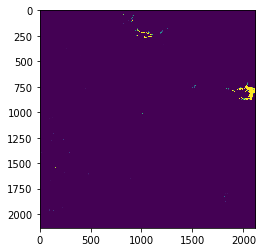

In [0]:
plt.imshow(np.clip(NDVI_17_1[1], 0.3, 1.0))

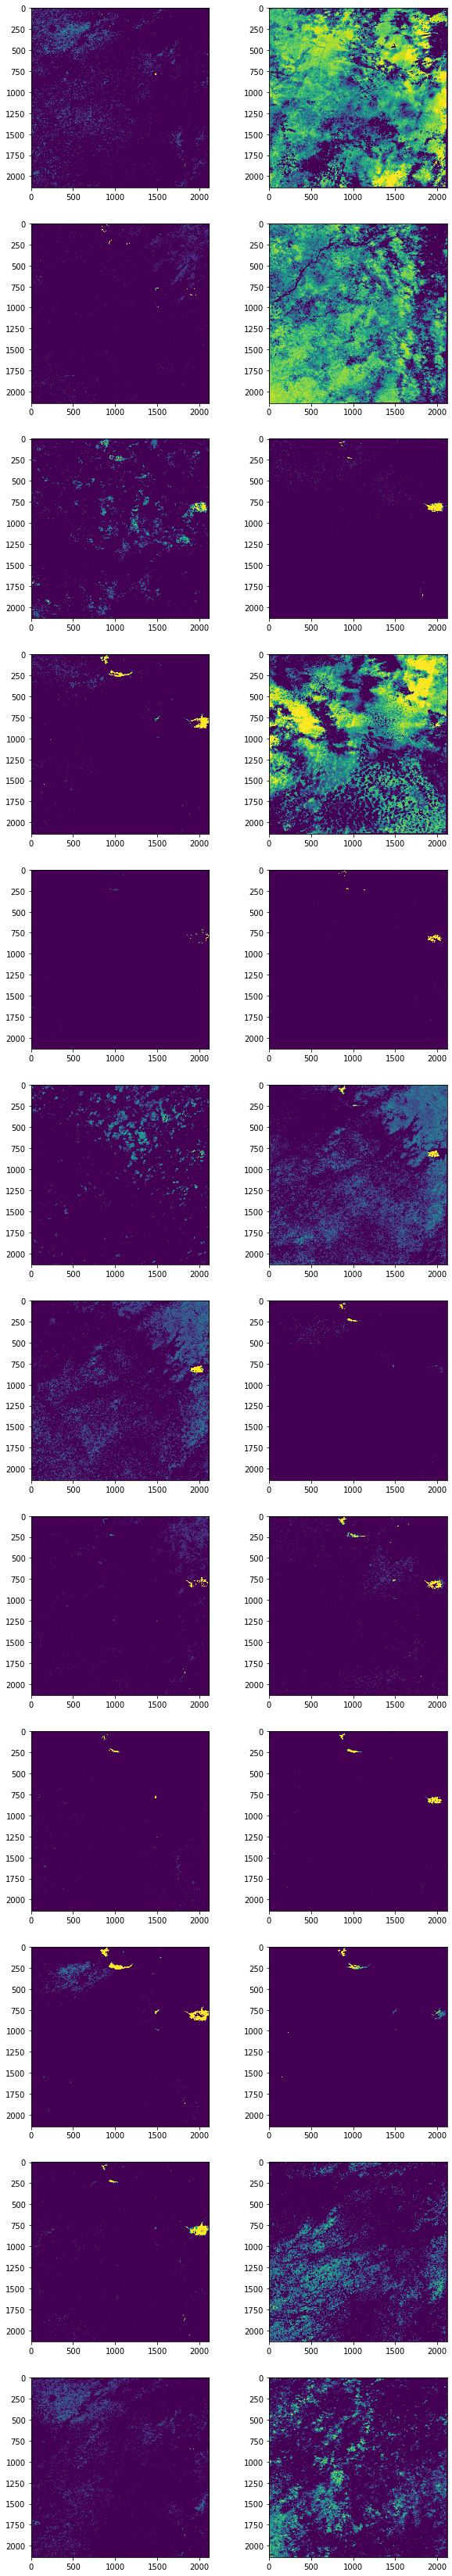

In [0]:
show_NDVIs_17_18(np.clip(NDVI_17_1, 0.3, 1.0), np.clip(NDVI_18_1, 0.3, 1.0))

In [0]:
show_NDVIs_17_18(-np.clip(NDVI_17_1, -1.0, -0.3), -np.clip(NDVI_18_1, -1.0, -0.3))

In [0]:
len(images)

48

In [0]:
def pixel_value_plot(ndvis, x, y):
  values_here = [ndvis[i][x][y] for i in range(len(ndvis))]

  plt.plot(values_here)

In [0]:
len(NDVIs)

24

In [0]:
pixel_value_plot(NDVIs, 5020, 5010)

NameError: ignored

In [0]:
def vegetation_thres_cross_frequency(ndvis, thres=0.3):
  res = sum(
      [img > thres for img in ndvis]
  )

  plt.imshow(res, cmap="Greys")
  return res

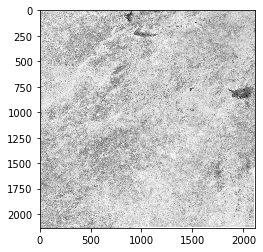

In [0]:
freqs = vegetation_thres_cross_frequency(NDVIs)

In [0]:
freqs.min(), freqs.max()

(0, 16)

In [0]:
freqs

array([[0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
freqs.shape

(2135, 2118)

In [0]:
cross_mask = (freqs > 15).astype(int)

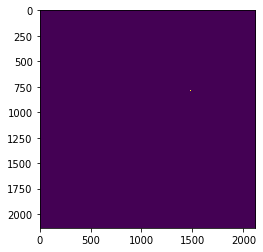

In [0]:
plt.imshow(cross_mask)

In [0]:
sum(sum(cross_mask)) 

23

In [0]:
coords = [(x, y) for x in range(freqs.shape[0]) for y in range(freqs.shape[1]) if freqs[x][y] > 15]

In [0]:
max_freq_coords_series = [
                          [NDVIs[idx][x][y] for idx in range(len(NDVIs))]  
                            for (x, y) in coords 
]

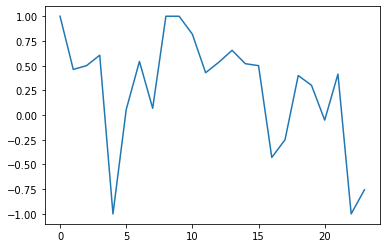

In [0]:
plt.plot(max_freq_coords_series[15])

In [0]:
max_freq_coords_series

[[0.0,
  0.0,
  0.7333330400001173,
  0.9999996666667779,
  0.31578942382272257,
  -0.368420994459843,
  -0.5128204733727841,
  0.3499999475000079,
  0.9999997000000901,
  0.9999998604651358,
  0.9272726766942176,
  -0.9999994000003599,
  0.5555554320987929,
  0.548386990634776,
  0.3999999760000014,
  0.3684209362881254,
  0.0,
  0.9999997272728017,
  0.9999997391305029,
  0.9999997142857959,
  0.8095235782313587,
  0.9999992500005624,
  -0.9999999250000057,
  -0.9999997500000626],
 [0.99999880000144,
  0.5714283265307172,
  0.4999998750000313,
  0.7460316749811103,
  -0.9999998235294429,
  -0.19999997818182055,
  -0.2962962633744893,
  0.33333326666668,
  0.9999991428578776,
  0.9999998723404419,
  0.7297296902848817,
  -0.7499994375004218,
  0.4634145663295757,
  0.7037036515775072,
  0.5517240808561296,
  0.428571306122484,
  0.3684209362881254,
  -0.6842103102493757,
  0.5813952677122882,
  0.9999998333333612,
  0.043478255198488455,
  0.5402298478002404,
  -0.9999998666666845,
  

In [0]:
res = max_freq_coords_series[0]

for arr in max_freq_coords_series[1:]:
  print(len(arr), len(res))
  res = [res[i] + arr[i] for i in range(len(res))]

res = [res[i] / len(max_freq_coords_series) for i in range(len(res))]

24 24
24 24
24 24
24 24
24 24
24 24
24 24
24 24
24 24
24 24
24 24
24 24
24 24
24 24
24 24
24 24
24 24
24 24
24 24
24 24
24 24
24 24


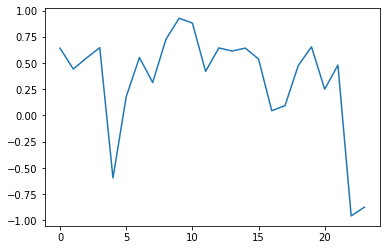

In [0]:
plt.plot(res)

In [0]:
len(max_freq_coords_series[0])

24

In [0]:
tmp=[np.zeros((5,5)) for i in range(len(NDVIs))]

In [0]:
for idx,img in enumerate(NDVIs):
  for i in range(5):
    for j in range(5):
      tmp[idx][i][j]=img[100+i][100+j]

In [0]:
x=[sum(sum(i)) for i in tmp]

In [0]:
len(x)

24

In [0]:
x[1]

-0.5037921055551839

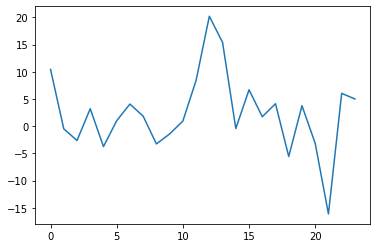

In [0]:
plt.plot(x)

In [0]:
cnt=0
coords_range=[]
h,w=NDVIs[1].shape

In [0]:
for x in range(h):
  for y in range(w):
    tmp=0
    for j in range(len(NDVIs)):
      if NDVIs[j][x][y]>0.3: tmp=tmp+1
      else: tmp=0
      if tmp>2:
        cnt=cnt+1
        coords_range.append((x,y))


In [0]:
cnt

151439

In [0]:
NDVIs[1].size

4521930

In [0]:
100*cnt/NDVIs[1].size

3.3489903647336425